<a href="https://colab.research.google.com/github/JoonYoung-Sohn/practice/blob/master/FastAI_backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matrix multiplication

In [1]:
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
from keras.datasets import mnist
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train,y_train,x_test,y_test = map(tensor, (x_train,y_train,x_test,y_test))
x_train = torch.reshape(x_train, shape=[x_train.shape[0],x_train.shape[1]*x_train.shape[2]])
x_test = torch.reshape(x_test, shape=[x_test.shape[0],x_test.shape[1]*x_test.shape[2]])

In [4]:
#n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8),
 torch.Size([60000, 784]),
 tensor([5, 0, 4,  ..., 5, 6, 8], dtype=torch.uint8),
 torch.Size([60000]),
 tensor(0, dtype=torch.uint8),
 tensor(9, dtype=torch.uint8))

In [5]:
mpl.rcParams['image.cmap'] = 'gray'

In [6]:
img = x_train[0]
img.view(28,28).type()

'torch.ByteTensor'

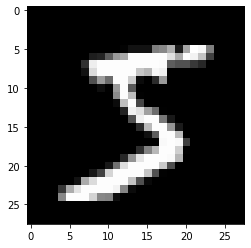

In [7]:
plt.imshow(img.view((28,28)));

In [8]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [9]:
def matmul(a,b):
    ar,ac = a.shape # n_rows * n_cols
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c

In [10]:
m1 = x_test[:5]
m2 = weights
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [11]:
%time t1=matmul(m1, m2)

CPU times: user 969 ms, sys: 0 ns, total: 969 ms
Wall time: 987 ms


In [12]:
t1.shape

torch.Size([5, 10])

In [13]:
len(x_train)

60000

In [14]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            # Any trailing ",:" can be removed
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [15]:
%timeit -n 10 _=matmul(m1, m2)

10 loops, best of 3: 1.6 ms per loop


Fully connected

In [16]:
def normalize(x, m, s): return (x-m)/s

In [17]:
train_mean,train_std = x_train.float().mean(),x_train.float().std()
train_mean,train_std

(tensor(33.3184), tensor(78.5675))

In [18]:
x_train = normalize(x_train, train_mean, train_std)
x_test = normalize(x_test, train_mean, train_std)

In [19]:
train_mean,train_std = x_train.mean(),x_train.std()
train_mean,train_std

(tensor(1.8892e-08), tensor(1.))

In [20]:
n,m = x_train.shape
c = y_train.max()+1
n,m,c

(60000, 784, tensor(10, dtype=torch.uint8))

In [21]:
# num hidden
nh = 50

In [22]:
# standard xavier init
w1 = torch.randn(m,nh)/math.sqrt(m)
b1 = torch.zeros(nh)
w2 = torch.randn(nh,1)/math.sqrt(nh)
b2 = torch.zeros(1)

In [23]:
def test_near_zero(a,tol=1e-3): assert a.abs()<tol, f"Near zero: {a}"

In [24]:
test_near_zero(w1.mean())
test_near_zero(w1.std()-1/math.sqrt(m))

In [25]:
x_test.mean(),x_test.std()

(tensor(0.0060), tensor(1.0077))

In [26]:
def lin(x, w, b): return x@w + b

In [27]:
t = lin(x_test, w1, b1)

In [28]:
t.mean(),t.std()

(tensor(-0.1172), tensor(1.0347))

In [29]:
def relu(x): return x.clamp_min(0.)

In [30]:
t = relu(lin(x_test, w1, b1))

In [31]:
t.mean(),t.std()

(tensor(0.3512), tensor(0.5640))

In [32]:
w1 = torch.randn(m,nh)*math.sqrt(2/m)

In [33]:
w1.mean(),w1.std()

(tensor(7.8470e-05), tensor(0.0507))

In [34]:
t = relu(lin(x_test, w1, b1))
t.mean(),t.std()

(tensor(0.5140), tensor(0.8091))

In [35]:
from torch.nn import *

In [36]:
w1 = torch.zeros(m,nh)
init.kaiming_normal_(w1, mode='fan_out')
t = relu(lin(x_test, w1, b1))

In [37]:
init.kaiming_normal_ # He initialization ??

<function torch.nn.init.kaiming_normal_>

In [38]:
w1.mean(),w1.std()

(tensor(-9.7063e-05), tensor(0.0508))

In [39]:
t.mean(),t.std()

(tensor(0.6012), tensor(0.8953))

In [40]:
torch.nn.Linear(m,nh).weight.shape

torch.Size([50, 784])

In [41]:
torch.nn.Linear.forward

<function torch.nn.modules.linear.Linear.forward>

In [42]:
torch.nn.functional.linear

<function torch.nn.functional.linear>

In [43]:
torch.nn.Conv2d

torch.nn.modules.conv.Conv2d

In [44]:
torch.nn.modules.conv._ConvNd.reset_parameters

<function torch.nn.modules.conv._ConvNd.reset_parameters>

In [45]:
def model(xb):
    l1 = lin(xb, w1, b1)
    l2 = relu(l1)
    l3 = lin(l2, w2, b2)
    return l3

In [46]:
%timeit -n 10 _=model(x_test)

10 loops, best of 3: 18.9 ms per loop


In [47]:
assert model(x_test).shape==torch.Size([x_test.shape[0],1])

In [48]:
model(x_test).shape

torch.Size([10000, 1])

In [49]:
def mse(output, targ):
  return (output.squeeze(-1) - targ).pow(2).mean()

In [50]:
y_train,y_test = y_train.float(),y_test.float()

In [51]:
preds = model(x_train)

In [52]:
preds.shape

torch.Size([60000, 1])

In [53]:
mse(preds, y_train)

tensor(16.3617)

In [54]:
def mse_grad(inp, targ): 
  # grad of loss with respect to output of previous layer
  inp.g = 2. * (inp.squeeze() - targ).unsqueeze(-1) / inp.shape[0]

In [55]:
def relu_grad(inp, out):
  # grad of relu with respect to input activations
  inp.g = (inp>0).float() * out.g

In [56]:
def lin_grad(inp, out, w, b):
  # grad of matmul with respect to input
  inp.g = out.g @ w.t()
  w.g = (inp.unsqueeze(-1) * out.g.unsqueeze(1)).sum(0)
  b.g = out.g.sum(0)

In [57]:
def forward_and_backward(inp, targ):
  # forward pass:
  l1 = inp @ w1 + b1
  l2 = relu(l1)
  out = l2 @ w2 + b2
  # we don't actually need the loss in backward!
  loss = mse(out, targ)
    
  # backward pass:
  mse_grad(out, targ)
  lin_grad(l2, out, w2, b2)
  relu_grad(l1, l2)
  lin_grad(inp, l1, w1, b1)

In [58]:
forward_and_backward(x_train, y_train)

In [59]:
# Save for testing against later
w1g = w1.g.clone()
w2g = w2.g.clone()
b1g = b1.g.clone()
b2g = b2.g.clone()
ig  = x_train.g.clone()

In [60]:
xt2 = x_train.clone().requires_grad_(True)
w12 = w1.clone().requires_grad_(True)
w22 = w2.clone().requires_grad_(True)
b12 = b1.clone().requires_grad_(True)
b22 = b2.clone().requires_grad_(True)

In [61]:
def forward(inp, targ):
    # forward pass:
    l1 = inp @ w12 + b12
    l2 = relu(l1)
    out = l2 @ w22 + b22
    # we don't actually need the loss in backward!
    return mse(out, targ)

In [62]:
loss = forward(xt2, y_train)
loss.backward()

In [63]:
print(w22.grad, w2g)
print(b22.grad, b2g)
print(w12.grad, w1g)
print(b12.grad, b1g)
print(xt2.grad, ig )

tensor([[ -3.6159],
        [ -0.5339],
        [ -4.2038],
        [ -8.4267],
        [ -1.7251],
        [ -2.5064],
        [ -1.2738],
        [ -2.9570],
        [ -1.4156],
        [ -2.8057],
        [ -0.5528],
        [ -2.1481],
        [ -2.5105],
        [ -1.9027],
        [ -4.6381],
        [ -2.8501],
        [ -5.4304],
        [ -0.0942],
        [ -2.9986],
        [ -0.8442],
        [ -0.3282],
        [ -7.9725],
        [ -1.1831],
        [ -0.3357],
        [ -2.8715],
        [ -4.3155],
        [ -2.8688],
        [ -4.8606],
        [ -1.8857],
        [ -0.7160],
        [ -1.2835],
        [ -4.4274],
        [ -1.2857],
        [ -1.4495],
        [ -8.5174],
        [ -9.1765],
        [ -5.4702],
        [ -9.5191],
        [ -0.0514],
        [ -0.7931],
        [ -1.9404],
        [ -3.0292],
        [ -1.9916],
        [-11.2115],
        [ -3.6262],
        [-10.2311],
        [ -3.7070],
        [ -0.7798],
        [ -2.1952],
        [ -4.3356]])

Layer as class

In [64]:
class Relu():
    def __call__(self, inp):
        self.inp = inp
        self.out = inp.clamp_min(0.)-0.5
        return self.out
    
    def backward(self):
        self.inp.g = (self.inp>0).float() * self.out.g

In [65]:
class Lin():
    def __init__(self, w, b):
        self.w,self.b = w,b
        
    def __call__(self, inp):
        self.inp = inp
        self.out = inp@self.w + self.b
        return self.out
    
    def backward(self):
        self.inp.g = self.out.g @ self.w.t()
        # Creating a giant outer product, just to sum it, is inefficient!
        self.w.g = (self.inp.unsqueeze(-1) * self.out.g.unsqueeze(1)).sum(0)
        self.b.g = self.out.g.sum(0)

In [66]:
class Mse():
    def __call__(self, inp, targ):
        self.inp = inp
        self.targ = targ
        self.out = (inp.squeeze() - targ).pow(2).mean()
        return self.out
    
    def backward(self):
        self.inp.g = 2. * (self.inp.squeeze() - self.targ).unsqueeze(-1) / self.targ.shape[0]

In [67]:
class Model():
    def __init__(self, w1, b1, w2, b2):
        self.layers = [Lin(w1,b1), Relu(), Lin(w2,b2)]
        self.loss = Mse()
        
    def __call__(self, x, targ):
        for l in self.layers: x = l(x)
        return self.loss(x, targ)
    
    def backward(self):
        self.loss.backward()
        for l in reversed(self.layers):
            l.backward()

In [68]:
w1.g,b1.g,w2.g,b2.g = [None]*4
model = Model(w1, b1, w2, b2)

In [69]:
%time loss = model(x_train, y_train)

CPU times: user 133 ms, sys: 0 ns, total: 133 ms
Wall time: 135 ms


In [70]:
%time model.backward()

CPU times: user 3.78 s, sys: 3.97 s, total: 7.75 s
Wall time: 7.78 s


In [71]:
class Module():
    def __call__(self, *args):
        self.args = args
        self.out = self.forward(*args)
        return self.out
    
    def forward(self): raise Exception('not implemented')
    def backward(self): self.bwd(self.out, *self.args)

In [72]:
class Relu(Module):
    def forward(self, inp): return inp.clamp_min(0.)-0.5
    def bwd(self, out, inp): inp.g = (inp>0).float() * out.g

In [73]:
class Lin(Module):
    def __init__(self, w, b): self.w,self.b = w,b
        
    def forward(self, inp): return inp@self.w + self.b
    
    def bwd(self, out, inp):
        inp.g = out.g @ self.w.t()
        self.w.g = inp.t() @ out.g
        self.b.g = out.g.sum(0)

In [74]:
class Mse(Module):
    def forward (self, inp, targ): return (inp.squeeze() - targ).pow(2).mean()
    def bwd(self, out, inp, targ): inp.g = 2*(inp.squeeze()-targ).unsqueeze(-1) / targ.shape[0]

In [75]:
from torch import nn

class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.layers = [nn.Linear(n_in,nh), nn.ReLU(), nn.Linear(nh,n_out)]
        self.loss = mse
        
    def __call__(self, x, targ):
        for l in self.layers: x = l(x)
        return self.loss(x.squeeze(), targ)

In [76]:
model = Model(m, nh, 1)

In [77]:
%time loss = model(x_train, y_train)

CPU times: user 114 ms, sys: 0 ns, total: 114 ms
Wall time: 119 ms


In [78]:
%time loss.backward()

CPU times: user 79.7 ms, sys: 1.71 ms, total: 81.4 ms
Wall time: 82.1 ms


Mini batch training

In [79]:
import torch.nn.functional as F

In [80]:
mpl.rcParams['image.cmap'] = 'gray'

In [81]:
n,m = x_train.shape
c = y_train.max()+1
nh = 50

In [82]:
class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.layers = [nn.Linear(n_in,nh), nn.ReLU(), nn.Linear(nh,n_out)]
        
    def __call__(self, x):
        for l in self.layers: x = l(x)
        return x

In [83]:
model = Model(m, nh, 10)
pred = model(x_train)

In [84]:
def log_softmax(x):
  return (x.exp()/(x.exp().sum(-1,keepdim=True))).log()

In [85]:
sm_pred = log_softmax(pred)

In [86]:
y_train[:3]

tensor([5., 0., 4.])

In [87]:
sm_pred[[0,1,2], [5,0,4]]
#sm_pred[[0,1,2]]

tensor([-2.2089, -2.3216, -2.5725], grad_fn=<IndexBackward>)

In [88]:
y_train.shape[0]

60000

In [89]:
loss_func = F.cross_entropy

In [90]:
def accuracy(out, yb):
  return (torch.argmax(out, dim=1)==yb).float().mean()

In [91]:
bs=64                  # batch size
xb = x_train[0:bs]     # a mini-batch from x
preds = model(xb)      # predictions
preds[0], preds.shape

(tensor([-0.1441, -0.4784,  0.4815,  0.2632,  0.1371,  0.1541, -0.2483, -0.1077,
          0.1633,  0.0476], grad_fn=<SelectBackward>), torch.Size([64, 10]))

In [92]:
yb = y_train[0:bs]
loss_func(preds, yb.long())

tensor(2.2698, grad_fn=<NllLossBackward>)

In [93]:
accuracy(preds, yb)

tensor(0.1875)

In [94]:
lr = 0.5   # learning rate
epochs = 1 # how many epochs to train for

In [95]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
#         set_trace()
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        loss = loss_func(model(xb), yb.long())

        loss.backward()
        with torch.no_grad():
            for l in model.layers:
                if hasattr(l, 'weight'):
                    l.weight -= l.weight.grad * lr
                    l.bias   -= l.bias.grad   * lr
                    l.weight.grad.zero_()
                    l.bias  .grad.zero_()

In [96]:
loss_func(model(xb), yb.long()), accuracy(model(xb), yb)

(tensor(0.0285, grad_fn=<NllLossBackward>), tensor(1.))

In [97]:
class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.l1 = nn.Linear(n_in,nh)
        self.l2 = nn.Linear(nh,n_out)
        
    def __call__(self, x):
      return self.l2(F.relu(self.l1(x)))

In [98]:
model = Model(m, nh, 10)

In [99]:
for name,l in model.named_children():
  print(f"{name}: {l}")

l1: Linear(in_features=784, out_features=50, bias=True)
l2: Linear(in_features=50, out_features=10, bias=True)


In [100]:
model

Model(
  (l1): Linear(in_features=784, out_features=50, bias=True)
  (l2): Linear(in_features=50, out_features=10, bias=True)
)

In [101]:
model.l1

Linear(in_features=784, out_features=50, bias=True)

In [102]:
def fit():
    for epoch in range(epochs):
        for i in range((n-1)//bs + 1):
            start_i = i*bs
            end_i = start_i+bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            loss = loss_func(model(xb), yb.long())

            loss.backward()
            with torch.no_grad():
                for p in model.parameters(): p -= p.grad * lr
                model.zero_grad()

In [103]:
fit()
loss_func(model(xb), yb.long()), accuracy(model(xb), yb.long())

(tensor(0.0062, grad_fn=<NllLossBackward>), tensor(1.))

In [104]:
layers = [nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10)]

In [105]:
class Model(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = layers
        for i,l in enumerate(self.layers): self.add_module(f'layer_{i}', l)
        
    def __call__(self, x):
        for l in self.layers: x = l(x)
        return x

In [106]:
model = Model(layers)

In [107]:
model

Model(
  (layer_0): Linear(in_features=784, out_features=50, bias=True)
  (layer_1): ReLU()
  (layer_2): Linear(in_features=50, out_features=10, bias=True)
)

In [108]:
class SequentialModel(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList(layers)
        
    def __call__(self, x):
        for l in self.layers: x = l(x)
        return x

In [109]:
model = SequentialModel(layers)

In [110]:
model

SequentialModel(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)

In [111]:
fit()

In [113]:
loss_func(model(xb), yb.long()), accuracy(model(xb), yb)

(tensor(0.0131, grad_fn=<NllLossBackward>), tensor(1.))

In [114]:
model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))

In [115]:
fit()
loss_func(model(xb), yb.long()), accuracy(model(xb), yb)

(tensor(0.0100, grad_fn=<NllLossBackward>), tensor(1.))

In [116]:
nn.Sequential

torch.nn.modules.container.Sequential

In [117]:
model

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=10, bias=True)
)

In [118]:
class Optimizer():
    def __init__(self, params, lr=0.5):
        self.params,self.lr=list(params),lr
        
    def step(self):
        with torch.no_grad():
            for p in self.params: p -= p.grad * self.lr

    def zero_grad(self):
        for p in self.params: p.grad.data.zero_()

In [119]:
model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))

In [120]:
opt = Optimizer(model.parameters())

In [122]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb.long())

        loss.backward()
        opt.step()
        opt.zero_grad()

In [123]:
loss,acc = loss_func(model(xb), yb.long()), accuracy(model(xb), yb)
loss,acc

(tensor(0.0185, grad_fn=<NllLossBackward>), tensor(1.))

In [124]:
from torch import optim

In [125]:
optim.SGD.step

<function torch.optim.sgd.SGD.step>

In [126]:
def get_model():
    model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))
    return model, optim.SGD(model.parameters(), lr=lr)

In [129]:
model,opt = get_model()
loss_func(model(xb), yb.long())

tensor(2.3606, grad_fn=<NllLossBackward>)

In [131]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb.long())

        loss.backward()
        opt.step()
        opt.zero_grad()

In [132]:
loss,acc = loss_func(model(xb), yb.long()), accuracy(model(xb), yb)
loss,acc

(tensor(0.0065, grad_fn=<NllLossBackward>), tensor(1.))

In [133]:
class Dataset():
    def __init__(self, x, y): self.x,self.y = x,y
    def __len__(self): return len(self.x)
    def __getitem__(self, i): return self.x[i],self.y[i]

In [134]:
train_ds,test_ds = Dataset(x_train, y_train),Dataset(x_test, y_test)

In [136]:
xb,yb = train_ds[0:5]
xb,yb

(tensor([[-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
         [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
         [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
         [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
         [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241]]),
 tensor([5., 0., 4., 1., 9.]))

In [137]:
model,opt = get_model()

In [139]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        xb,yb = train_ds[i*bs : i*bs+bs]
        pred = model(xb)
        loss = loss_func(pred, yb.long())

        loss.backward()
        opt.step()
        opt.zero_grad()

In [140]:
loss,acc = loss_func(model(xb), yb.long()), accuracy(model(xb), yb)
loss,acc

(tensor(0.0197, grad_fn=<NllLossBackward>), tensor(1.))

In [141]:
class Sampler():
    def __init__(self, ds, bs, shuffle=False):
        self.n,self.bs,self.shuffle = len(ds),bs,shuffle
        
    def __iter__(self):
        self.idxs = torch.randperm(self.n) if self.shuffle else torch.arange(self.n)
        for i in range(0, self.n, self.bs): yield self.idxs[i:i+self.bs]

In [142]:
small_ds = Dataset(*train_ds[:10])

In [143]:
s = Sampler(small_ds,3,False)
[o for o in s]

[tensor([0, 1, 2]), tensor([3, 4, 5]), tensor([6, 7, 8]), tensor([9])]

In [144]:
s = Sampler(small_ds,3,True)
[o for o in s]

[tensor([7, 1, 4]), tensor([9, 0, 8]), tensor([6, 5, 2]), tensor([3])]

In [145]:
def collate(b):
    xs,ys = zip(*b)
    return torch.stack(xs),torch.stack(ys)

In [146]:
class DataLoader():
    def __init__(self, ds, sampler, collate_fn=collate):
        self.ds,self.sampler,self.collate_fn = ds,sampler,collate_fn
        
    def __iter__(self):
        for s in self.sampler: yield self.collate_fn([self.ds[i] for i in s])

In [147]:
train_samp = Sampler(train_ds, bs, shuffle=True)
test_samp = Sampler(test_ds, bs, shuffle=False)

In [149]:
train_dl = DataLoader(train_ds, sampler=train_samp, collate_fn=collate)
test_dl = DataLoader(test_ds, sampler=test_samp, collate_fn=collate)

tensor(7.)

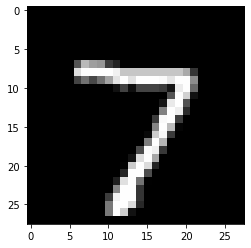

In [150]:
xb,yb = next(iter(test_dl))
plt.imshow(xb[0].view(28,28))
yb[0]

tensor(2.)

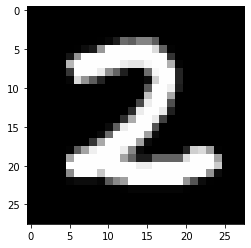

In [151]:
xb,yb = next(iter(train_dl))
plt.imshow(xb[0].view(28,28))
yb[0]

In [163]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        # Handle batchnorm / dropout
        model.train()
#         print(model.training)
        for xb,yb in train_dl:
            loss = loss_func(model(xb), yb.long())
            loss.backward()
            opt.step()
            opt.zero_grad()

        model.eval()
#         print(model.training)
        with torch.no_grad():
            tot_loss,tot_acc = 0.,0.
            for xb,yb in valid_dl:
                pred = model(xb)
                tot_loss += loss_func(pred, yb.long())
                tot_acc  += accuracy (pred,yb)
        nv = len(valid_dl)
        print(epoch, tot_loss/nv, tot_acc/nv)
    return tot_loss/nv, tot_acc/nv

In [154]:
def get_dls(train_ds, valid_ds, bs, **kwargs):
    return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
            DataLoader(valid_ds, batch_size=bs*2, **kwargs))

In [161]:
from torch.utils.data import DataLoader, SequentialSampler, RandomSampler

In [164]:
train_dl,test_dl = get_dls(train_ds, test_ds, bs)
model,opt = get_model()
loss,acc = fit(5, model, loss_func, opt, train_dl, test_dl)

0 tensor(0.2077) tensor(0.9372)
1 tensor(0.1915) tensor(0.9477)
2 tensor(0.2622) tensor(0.9320)
3 tensor(0.1985) tensor(0.9463)
4 tensor(0.1855) tensor(0.9502)
